### Импорты

In [55]:
import numpy as np
import pandas as pd

In [2]:
from simpledbf import Dbf5

SQLalchemy is not installed. No support for SQL output.


In [41]:
import matplotlib.pyplot as plt

### Загрузка из dbf (файлы баз данных)

загружаем данные из файлов формата `dbf`  с использованием библиотеки `simpledbf`

In [3]:
goods_dbf = Dbf5('goods.dbf', codec='cp866')
groups_dbf = Dbf5('groups.dbf', codec='cp866')

конвертируем в нативную для `Pandas` форму датафрейма `df`

In [4]:
goods_df = goods_dbf.to_dataframe()
groups_df = groups_dbf.to_dataframe()

In [5]:
groups_df.head()

,GROUP_ID,NAME
0,1,Гомеопатия
1,2,Лечебно-косметические средства
2,3,"Противоревматические,анальгезирующие,жаропониж..."
3,4,Респираторные заболевания
4,5,Гормоны


In [9]:
goods_df.shape

(8916, 4)

In [6]:
goods_df.head()

,TOVAR_ID,UPAC,MAKER,GROUP_ID
0,19,12.0,САГМЕЛ,3
1,20,6.0,САГМЕЛ,4
2,21,15.0,БЕРЛИН-ХЕМИ АГ (ГРУППА МЕНАРИНИ),5
3,22,270.0,БЕРЛИН-ХЕМИ АГ (ГРУППА МЕНАРИНИ),5
4,26,1.0,АРМАВИРСКАЯ БИОФАБРИКА,6


### Слияние таблиц по колонке GROUP_ID

In [13]:
merged_df = pd.merge(left=goods_df, right=groups_df, on='GROUP_ID', how='left')

In [14]:
merged_df.head()

,TOVAR_ID,UPAC,MAKER,GROUP_ID,NAME
0,19,12.0,САГМЕЛ,3,"Противоревматические,анальгезирующие,жаропониж..."
1,20,6.0,САГМЕЛ,4,Респираторные заболевания
2,21,15.0,БЕРЛИН-ХЕМИ АГ (ГРУППА МЕНАРИНИ),5,Гормоны
3,22,270.0,БЕРЛИН-ХЕМИ АГ (ГРУППА МЕНАРИНИ),5,Гормоны
4,26,1.0,АРМАВИРСКАЯ БИОФАБРИКА,6,Противоопухолевые ср-ва


### Сохранение и загрузка объединенных данных

In [15]:
merged_df.to_csv('merged_by_group_id.csv', header=True, index=False)

In [16]:
merged_df = pd.read_csv('merged_by_group_id.csv')

In [17]:
merged_df.head()

,TOVAR_ID,UPAC,MAKER,GROUP_ID,NAME
0,19,12.0,САГМЕЛ,3,"Противоревматические,анальгезирующие,жаропониж..."
1,20,6.0,САГМЕЛ,4,Респираторные заболевания
2,21,15.0,БЕРЛИН-ХЕМИ АГ (ГРУППА МЕНАРИНИ),5,Гормоны
3,22,270.0,БЕРЛИН-ХЕМИ АГ (ГРУППА МЕНАРИНИ),5,Гормоны
4,26,1.0,АРМАВИРСКАЯ БИОФАБРИКА,6,Противоопухолевые ср-ва


### Интерактивный анализ данных

 Распределения продаж товаров в разрезе производителя и групп товаров

In [26]:
grouped_df = merged_df.groupby(by=['MAKER', 'NAME']).agg({'UPAC':'sum'})

In [28]:
grouped_df.head(10)

UPAC
MAKER                      NAME                                                     
"ЛАБОРАТОРИЯ ФАРМАЧЕУТИКО" Противоревматические,анальгезирующие,жаропонижа...    1.0
                           Сердечно-сосудистые средства                          1.0
                           Синтетические антибактериальные препараты             1.0
3М                         Фитопрепараты                                         1.0
А.Ж.С.ФАРМА                Алкоголизм,наркомания,курение.                       10.0
АБОЛМЕД                    Антибиотики                                          50.0
АВД ФАРМ И КО/ВИАТРИС ГМБХ Заболевания желудочно-киш.тракта                      0.0
АВЕНТИС ФАРМА              Анестезиология и реанимация                           0.0
                           Антиаллергические препараты                         306.0
                           Бактерийные препараты,вакцины,сыворотки               0.0

транспонированное представление

In [31]:
grouped_df.T

MAKER                          "ЛАБОРАТОРИЯ ФАРМАЧЕУТИКО"  \
NAME  Противоревматические,анальгезирующие,жаропонижающие   
UPAC                                                 1.0    

MAKER                                                                         \
NAME  Сердечно-сосудистые средства Синтетические антибактериальные препараты   
UPAC                           1.0                                       1.0   

MAKER            3М                    А.Ж.С.ФАРМА     АБОЛМЕД  \
NAME  Фитопрепараты Алкоголизм,наркомания,курение. Антибиотики   
UPAC            1.0                           10.0        50.0   

MAKER       АВД ФАРМ И КО/ВИАТРИС ГМБХ               АВЕНТИС ФАРМА  \
NAME  Заболевания желудочно-киш.тракта Анестезиология и реанимация   
UPAC                               0.0                         0.0   

MAKER                                                                      \
NAME  Антиаллергические препараты Бактерийные препараты,вакцины,сыворотки   
UPAC                        306.0                                     0.0   

MAKER      ...                    ЯРОСЛАВСКАЯ Ф.Ф-КА                        \
NAME       ...      Заболевания желудочно-киш.тракта Коррекция метаболизма   
UPAC       ...                                 124.0                   0.0   

MAKER                                                               \
NAME  Противоопухолевые ср-ва Противопротозойные и противопаразит.   
UPAC                     40.0                                180.0   

MAKER                                                      \
NAME  Противоревматические,анальгезирующие,жаропонижающие   
UPAC                                               722.0    

MAKER                                                         \
NAME  Респираторные заболевания Сердечно-сосудистые средства   
UPAC                      486.0                        308.0   

MAKER                                                                     
NAME  Сиропы,бальзамы,настойки Средства,действующие на ЦНС Фитопрепараты  
UPAC                      54.0                       257.0          40.0  

[1 rows x 2871 columns]

Распределения продаж товаров в разрезе групп товаров

In [48]:
grouped_name_df = merged_df.groupby(by=['NAME']).agg({'UPAC':'sum'})

In [49]:
grouped_name_df.head()

,UPAC
NAME,
Адаптогены,371.0
Акушерство и гинекология,9918.0
"Алкоголизм,наркомания,курение.",1254.0
Анестезиология и реанимация,4665.0
Антиаллергические препараты,25463.0


In [56]:
index = np.arange(len(grouped_name_df))
values = grouped_name_df.UPAC.values

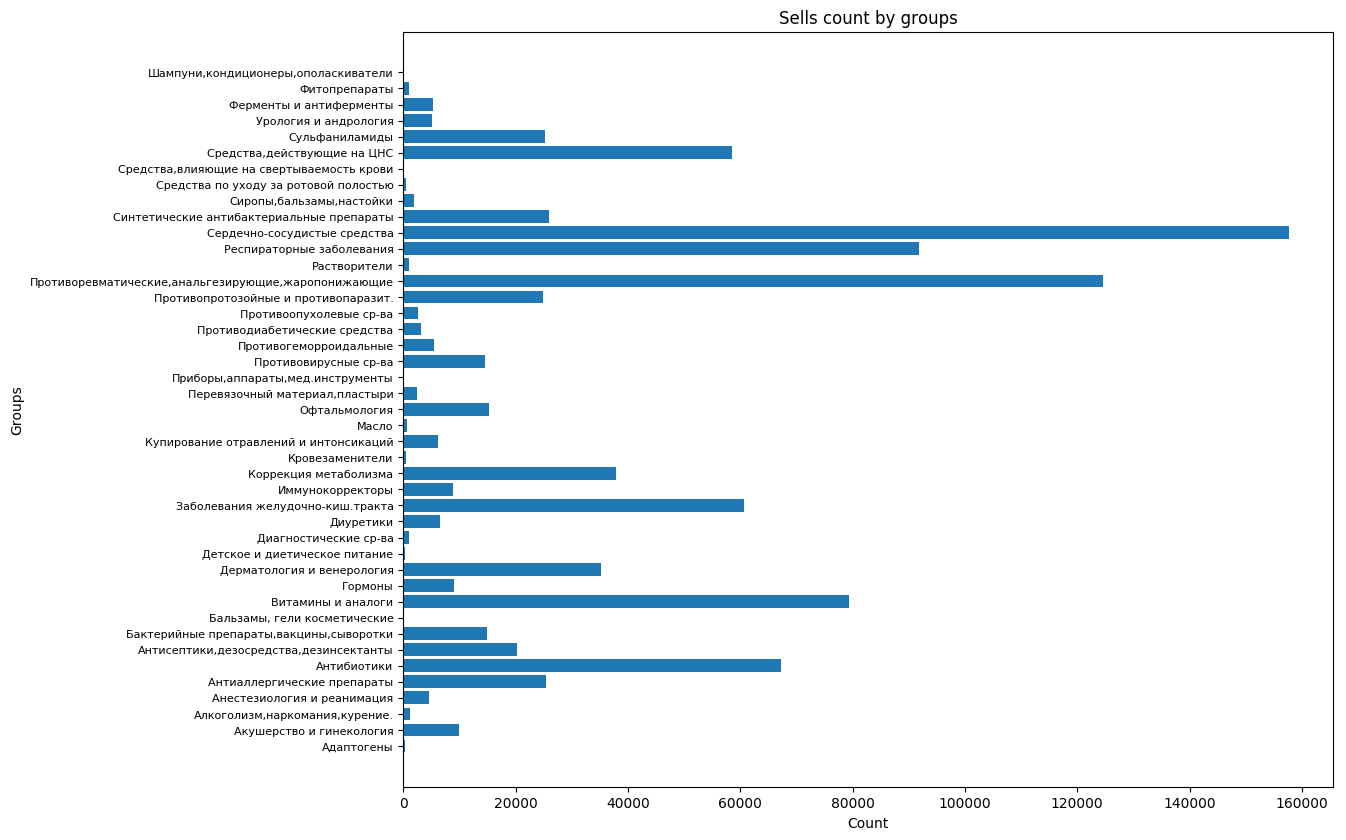

In [72]:
plt.figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')
plt.barh(index, values)
plt.ylabel('Groups', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.yticks(index, grouped_name_df.index, fontsize=8, rotation=0)
plt.title('Sells count by groups')
plt.show()